In [33]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np

In [34]:
OUTPUT_DIR = '../model_outputs/'
SAVE_DIR = '../figures/'

In [35]:
csv_list =[]
for i in os.listdir(OUTPUT_DIR):
    csv_list.append(OUTPUT_DIR+i+'/log.csv')

In [36]:
csv_list

['../model_outputs/NestedUNET_base/log.csv',
 '../model_outputs/NestedUNET_with_augmentation/log.csv',
 '../model_outputs/UNET_base/log.csv',
 '../model_outputs/UNET_with_augmentation/log.csv']

In [37]:
UNET_BASE = pd.read_csv(csv_list[2])
UNET_AUG = pd.read_csv(csv_list[3])
NestedUNET_Base = pd.read_csv(csv_list[0])
NestedUNET_Aug = pd.read_csv(csv_list[1])

In [41]:
UNET_BASE.sort_values('val_dice',ascending=False).head(1)


,epoch,lr,loss,iou,dice,val_loss,val_iou,val_dice
67,67.0,0.001,0.232076,0.716994,0.831326,0.324707,0.614226,0.741221


In [42]:
UNET_AUG.sort_values('val_dice',ascending=False).head(1)


,epoch,lr,loss,iou,dice,val_loss,val_iou,val_dice
73,73.0,0.001,0.300556,0.656185,0.787645,0.345819,0.6054,0.734012


In [43]:
NestedUNET_Base.sort_values('val_dice',ascending=False).head(1)


,epoch,lr,loss,iou,dice,val_loss,val_iou,val_dice
67,67.0,0.001,0.219145,0.731504,0.841655,0.348584,0.625245,0.747787


In [44]:
NestedUNET_Aug.sort_values('val_dice',ascending=False).head(1)

,epoch,lr,loss,iou,dice,val_loss,val_iou,val_dice
70,70.0,0.001,0.298594,0.651872,0.784677,0.351299,0.610549,0.738742


# Definitions

In [24]:
def rename(df):
    df.rename(columns={'dice':'train_dice','iou':'train_iou','loss':'train_loss'},inplace=True)
    return df

In [25]:
def plot_loss(df,title):
    plt.plot(df.epoch,df.train_loss,marker='o',color='r')
    plt.plot(df.epoch,df.val_loss,marker='+',color='b')
    plt.title(title, fontsize=13) 
    plt.legend(fontsize=12)
    plt.savefig(SAVE_DIR+title+'.png',dpi=300)
    plt.show()

In [26]:
def plot_loss(df, title):
    plt.plot(df.epoch, df.train_loss, marker='o', color='r', label='Training Loss')
    plt.plot(df.epoch, df.val_loss, marker='+', color='b', label='Validation Loss')
    plt.title(title, fontsize=13)
    plt.legend(fontsize=12)
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.savefig(SAVE_DIR + title + '.png', dpi=300)
    plt.show()

In [27]:
def plot_metric(df,title,iou=True):
    if iou == True:
        plt.plot(df.epoch,df.train_dice,marker='x',color='r')
        plt.plot(df.epoch,df.val_dice,marker='+',color='orangered')
    else:
        plt.plot(df.epoch,df.train_iou,marker='o',color='navy')
        plt.plot(df.epoch,df.val_iou,marker='+',color='royalblue')
    plt.title(title, fontsize=13) 
    plt.ylabel('Score', fontsize=14)
    plt.xlabel('Epochs', fontsize=14)
    plt.legend(fontsize=12, loc='best')
    plt.savefig(SAVE_DIR+title+'.png',dpi=300)
    plt.show()
    

In [28]:
def plot_metric(df, title, iou=True):
    if iou:
        plt.plot(df.epoch, df.train_dice, marker='x', color='r', label='Training Dice')
        plt.plot(df.epoch, df.val_dice, marker='+', color='orangered', label='Validation Dice')
    else:
        plt.plot(df.epoch, df.train_iou, marker='o', color='navy', label='Training IOU')
        plt.plot(df.epoch, df.val_iou, marker='+', color='royalblue', label='Validation IOU')
    
    plt.title(title, fontsize=13)
    plt.ylabel('Score')
    plt.xlabel('Epochs')
    plt.legend(fontsize=12, loc='best')
    plt.savefig(SAVE_DIR + title + '.png', dpi=300)
    plt.show()

# UNET

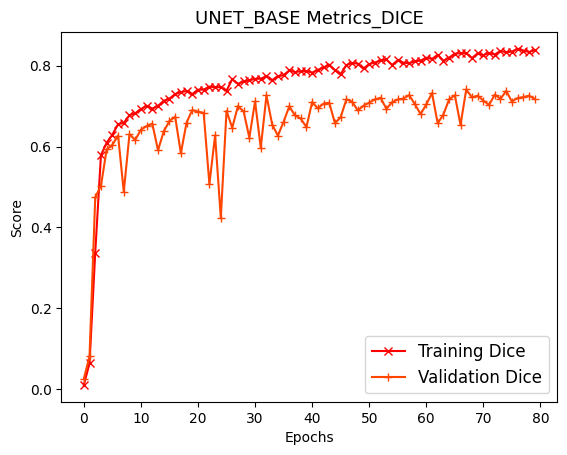

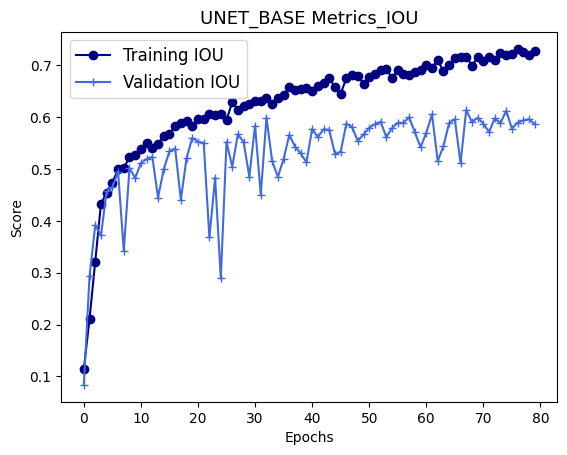

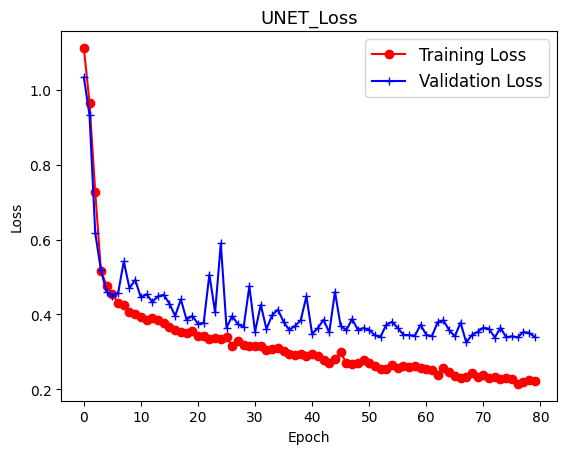

In [29]:
UNET_BASE= rename(UNET_BASE)
plot_metric(UNET_BASE,'UNET_BASE Metrics_DICE')
plot_metric(UNET_BASE,'UNET_BASE Metrics_IOU',False)
plot_loss(UNET_BASE,'UNET_Loss')

# UNET_AUGMENTATION

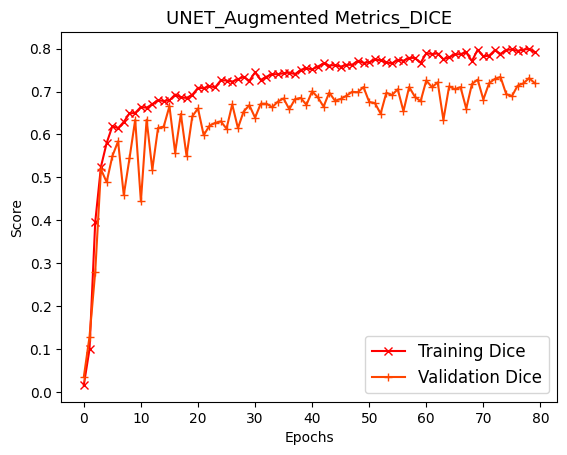

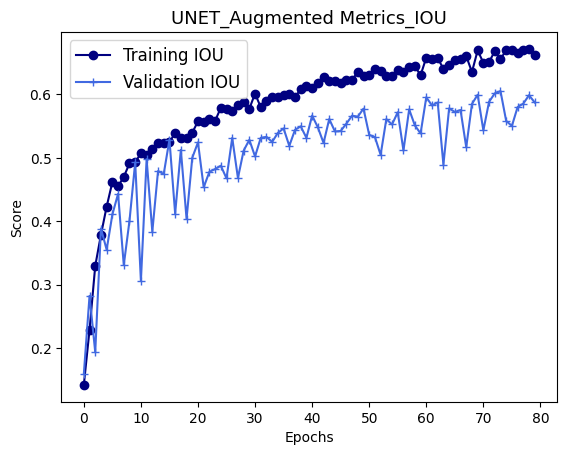

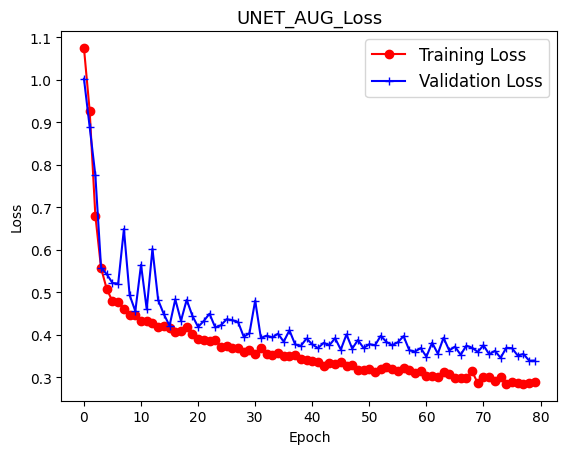

In [30]:
UNET_AUG= rename(UNET_AUG)
plot_metric(UNET_AUG,'UNET_Augmented Metrics_DICE')
plot_metric(UNET_AUG,'UNET_Augmented Metrics_IOU',False)
plot_loss(UNET_AUG,'UNET_AUG_Loss')

# NestedUNET

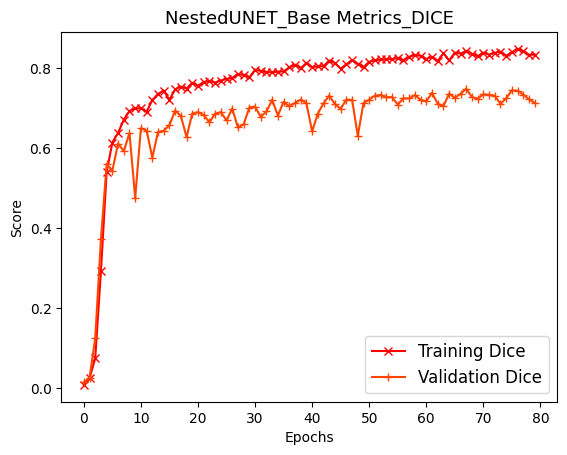

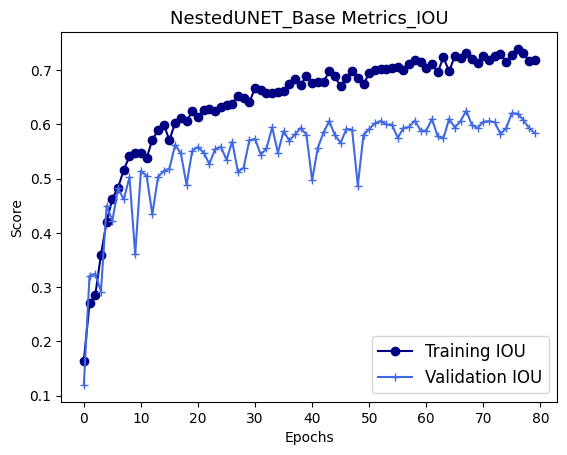

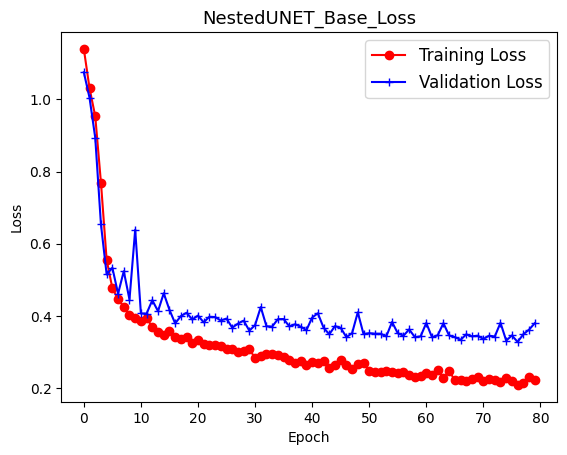

In [31]:
NestedUNET_Base= rename(NestedUNET_Base)
plot_metric(NestedUNET_Base,'NestedUNET_Base Metrics_DICE')
plot_metric(NestedUNET_Base,'NestedUNET_Base Metrics_IOU',False)
plot_loss(NestedUNET_Base,'NestedUNET_Base_Loss')

# NestedUNET Augmented

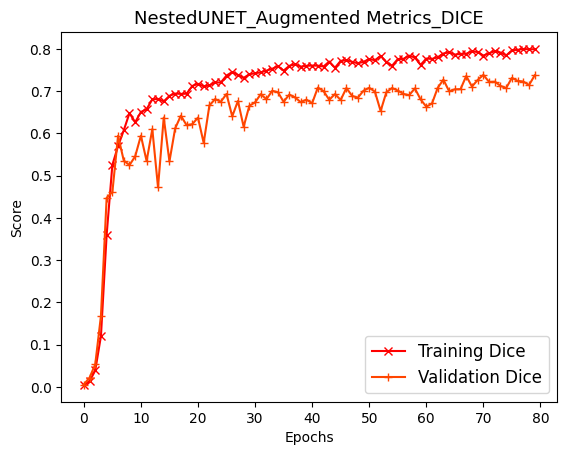

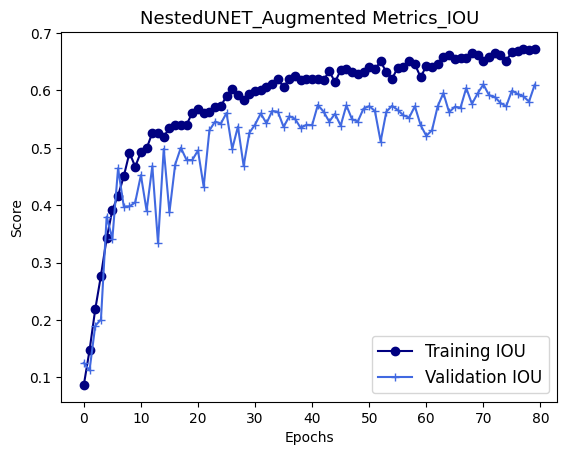

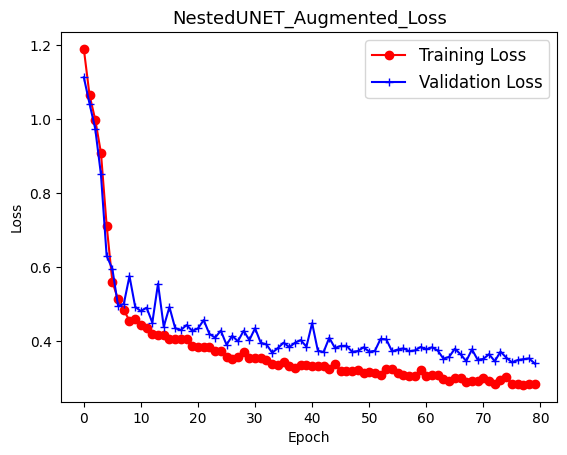

In [32]:
NestedUNET_Aug= rename(NestedUNET_Aug)
plot_metric(NestedUNET_Aug,'NestedUNET_Augmented Metrics_DICE')
plot_metric(NestedUNET_Aug,'NestedUNET_Augmented Metrics_IOU',False)
plot_loss(NestedUNET_Aug,'NestedUNET_Augmented_Loss')